In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
data_dir = '/home/ali/Documents/term6/deep-learning/complete-tensorflow-2-and-keras-deep-learning-bootcamp-2020/course/07-convolutional-neural-networks-cnns/cell_images'

In [4]:
from matplotlib.image import imread

In [5]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [6]:
image_shape = (130, 130, 30)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-03-29 12:12:09.772726: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 12:12:09.772746: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
image_gen = ImageDataGenerator(rotation_range=20, 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [9]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [10]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import load_model

In [12]:
model = load_model('../04-cnns/malaria_detector.h5')

2022-03-29 12:12:11.792233: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-29 12:12:11.792350: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-29 12:12:11.792410: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ali): /proc/driver/nvidia/version does not exist
2022-03-29 12:12:11.793018: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# model.history.history

In [14]:
model.evaluate_generator(test_image_gen)

/tmp/ipykernel_54131/4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[36.038658142089844, 0.8742307424545288]

In [15]:
model.metrics_names

['loss', 'accuracy']

In [16]:
pred = model.predict_generator(test_image_gen)

/tmp/ipykernel_54131/2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [17]:
predictions = pred > 0.5

In [18]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [19]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [20]:
len(pred)

2600

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [23]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1272,   28],
       [ 302,  998]])

In [26]:
para_cell = train_path + 'parasitized/' + os.listdir(train_path + 'parasitized/')[0]

In [27]:
from tensorflow.keras.preprocessing import image

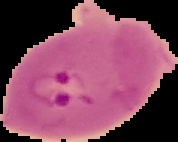

In [28]:
image.load_img(para_cell)

In [30]:
my_image = image.load_img(para_cell, target_size=image_shape)

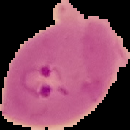

In [31]:
my_image

In [33]:
my_img_array = image.img_to_array(my_image)

In [34]:
my_img_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [35]:
my_img_array.shape

(130, 130, 3)

In [37]:
my_img_array = np.expand_dims(my_img_array, axis=0)

In [39]:
my_img_array.shape

(1, 130, 130, 3)

In [40]:
model.predict(my_img_array)

array([[0.]], dtype=float32)

In [41]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}